# K-Nearest-Neighbr

KNN est une méthode d'apprentissage supervisé extrêmement simple à implémenter dans sa forme la plus élémentaire, et pourtant souvent performante pour des tâches de classification complexes.

Le principe des méthodes du plus proche voisin est de trouver un nombre k prédéfini d'échantillons d'apprentissage les plus proches en distance du nouveau point , et de prédire la classe à partir de ceux-ci. La classe à laquelle est attribuée la nouvelle donnée est la classe majoritaire parmi ses K plus proches voisins au sens d'une distance choisie.

# Cas Pratique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/sonar.csv')
df.head(5)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: >

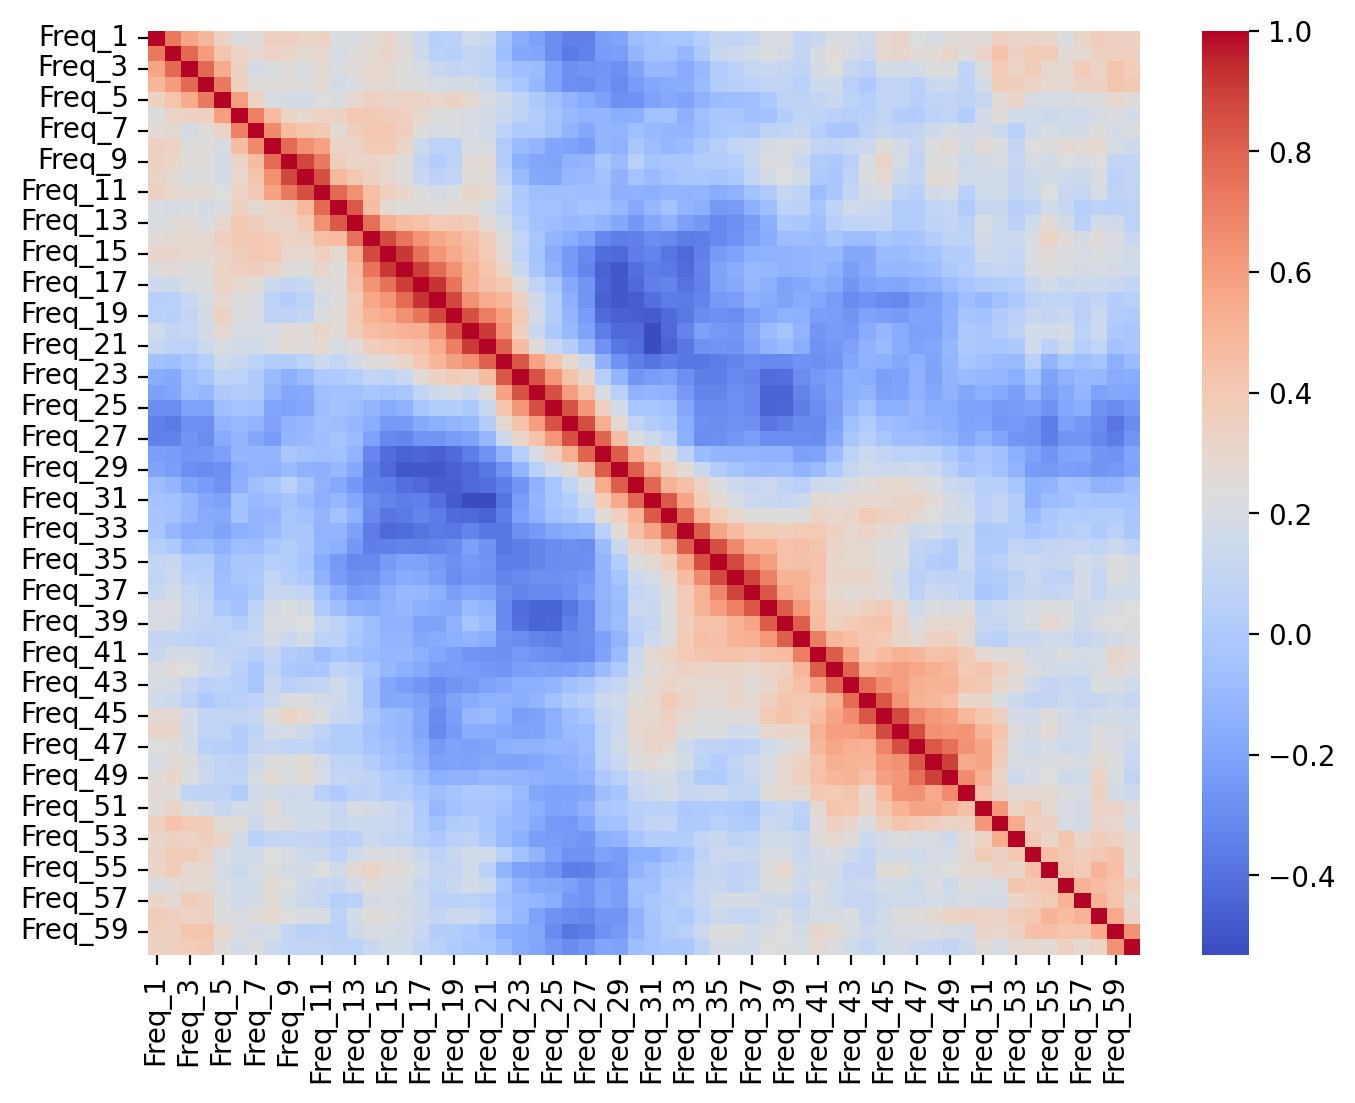

In [6]:
plt.figure(dpi=200,figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

In [8]:
df['Label'] = df['Label'].map({'R':0, 'M':1})
df['Label'].value_counts()

Label
1    111
0     97
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

operation = [('scaler', scaler), ('knn', knn)]

pipe = Pipeline(operation)

In [12]:
from sklearn.model_selection import GridSearchCV

k_value = list(range(1,30))

params = {"knn__n_neighbors" : k_value}

clf = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'knn__n_neighbors': [1, 2, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and can

In [14]:
clf.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [13]:
clf.best_params_

{'knn__n_neighbors': 2}

## Alternative pour chercher K avec elbow

c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\lyhen\Downloads\ML\.env\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\lyhen\Downloads\ML\.e

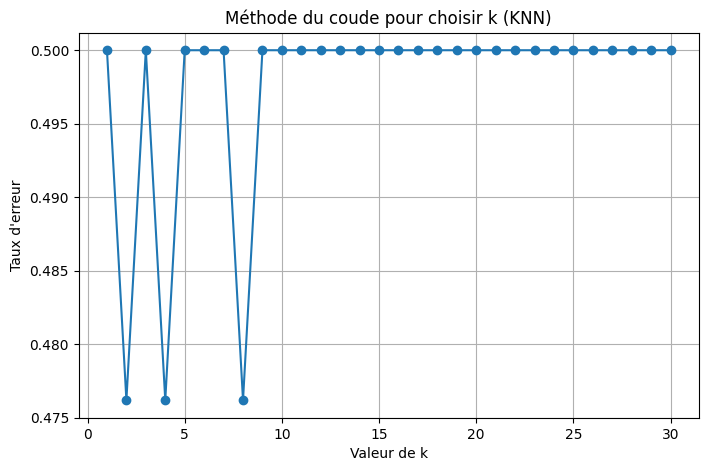

In [16]:
from sklearn.metrics import accuracy_score

error_rates = []

k_values = range(1, 31)

X_1 = scaler.fit_transform(X_train)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_1, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel("Valeur de k")
plt.ylabel("Taux d'erreur")
plt.title("Méthode du coude pour choisir k (KNN)")
plt.grid(True)
plt.show()


Le min erreur est donc 2

In [18]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010590,0.001387,1.205241,2.386391,1,{'knn__n_neighbors': 1},0.911765,0.878788,0.787879,0.848485,0.878788,0.861141,0.041745,2
1,0.009114,0.000673,0.013791,0.003730,2,{'knn__n_neighbors': 2},0.911765,0.939394,0.848485,0.787879,0.878788,0.873262,0.052518,1
2,0.012108,0.002758,0.012117,0.000721,3,{'knn__n_neighbors': 3},0.823529,0.818182,0.787879,0.787879,0.969697,0.837433,0.067777,3
3,0.010103,0.000906,0.012148,0.000471,4,{'knn__n_neighbors': 4},0.823529,0.787879,0.757576,0.787879,0.939394,0.819251,0.063600,4
4,0.010247,0.000925,0.012021,0.000776,5,{'knn__n_neighbors': 5},0.764706,0.848485,0.727273,0.757576,0.878788,0.795365,0.057941,5
5,0.009624,0.001047,0.012609,0.000523,6,{'knn__n_neighbors': 6},0.794118,0.757576,0.696970,0.818182,0.848485,0.783066,0.052340,6
6,0.010540,0.001682,0.012828,0.000585,7,{'knn__n_neighbors': 7},0.764706,0.787879,0.696970,0.757576,0.818182,0.765062,0.040088,8
7,0.016189,0.002699,0.018032,0.002794,8,{'knn__n_neighbors': 8},0.794118,0.787879,0.696970,0.787879,0.818182,0.777005,0.041546,7
8,0.012050,0.003686,0.012589,0.001439,9,{'knn__n_neighbors': 9},0.794118,0.757576,0.696970,0.727273,0.787879,0.752763,0.036686,11
9,0.010536,0.001132,0.013223,0.000576,10,{'knn__n_neighbors': 10},0.764706,0.727273,0.727273,0.727273,0.727273,0.734759,0.014973,20


In [21]:
y_pred = clf.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix(y_test, y_pred)



array([[20,  1],
       [ 5, 16]])

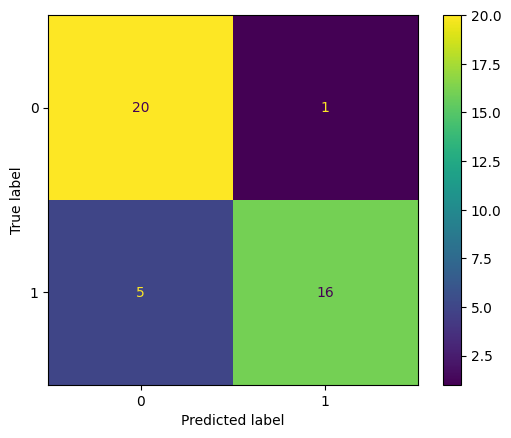

In [23]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)